# Text classification and Evaluation, Review
## from https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/teaching/data/txt_sentoken" # folder containing the 2 categories of documents in individual folders.
movie_data = load_files(DATA_DIR, encoding = "utf-8", decode_error="replace") # folder containing the 2 categories of documents in individual folders.
X, y = movie_data.data, movie_data.target
DocList = X

#Pre-process the documents

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
documents = []

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    from nltk.stem import WordNetLemmatizer

    stemmer = WordNetLemmatizer()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    print(document)
    documents.append(document)

print(len(documents))

america love convenience after all we re the culture that invented the cell phone the 24 hour atm and my most beloved the remote control yet perhaps this time with ghost of mar we have taken our love of convenience to far ghost of mar star natasha henstridge a tough a nail pill poppin martian cop sent with her squadron to retrieve demolition williams ice cube from remote mining town for trial back home when she and her comrade appropriately dubbed the commander the rookie and the guy with the cool accent discover the town resident slaughtered they are forced to team up with williams to escape from the remaining resident head chopping alien possessed clutch filled with lovely overuse of storytelling flashback flash sideways and viewpoint change ghost of mar is hapless mishmash of poorly constructed dialogue and ill conceived action sequence the only thing keeping this film from becoming an incomprehensible mess is the sheer idiotic simplicity of it story ripped straight from the page of

#Convert the word to a vector using BOW model. TF vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
print(X)
print(X.shape)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
(102, 1214)
(102,)


#Convert the text using TFIDF vectoriser.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.09410129 0.        ]
 [0.         0.         0.         ... 0.         0.0486903  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.06448924 0.        ]
 [0.         0.         0.0831978  ... 0.         0.04891958 0.        ]
 [0.         0.         0.         ... 0.         0.         0.09230415]]


#Splitting the data and fitting a model

#Plot the results

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


#MLP Example

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Neural network
model = Sequential()
print(X_train.shape)
print(y_train.shape)
# print(y_train)
noFeatures = X_train.shape[1]
model.add(Dense(10, input_dim=noFeatures, activation='relu',name='input')) # the first parameter is the units which is the number of outputs from this layer, forms the number of inputs to the next, ie, no. of neurons.
model.add(Dense(10, activation='relu',name='hidden1'))
model.add(Dense(10, activation='relu',name='hidden2'))
model.add(Dense(1, activation='sigmoid',name='output'))
print(model.summary())
#Specify the loss function,optimiser and the evaluator.
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#train the model
#history = model.fit(X_train, y_train, epochs=20, batch_size=30,validation_split=0.1)
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)

(81, 1214)
(81,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                12150     
                                                                 
 hidden1 (Dense)             (None, 10)                110       
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 12381 (48.36 KB)
Trainable params: 12381 (48.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


#Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6420
Testing Accuracy:  0.3810


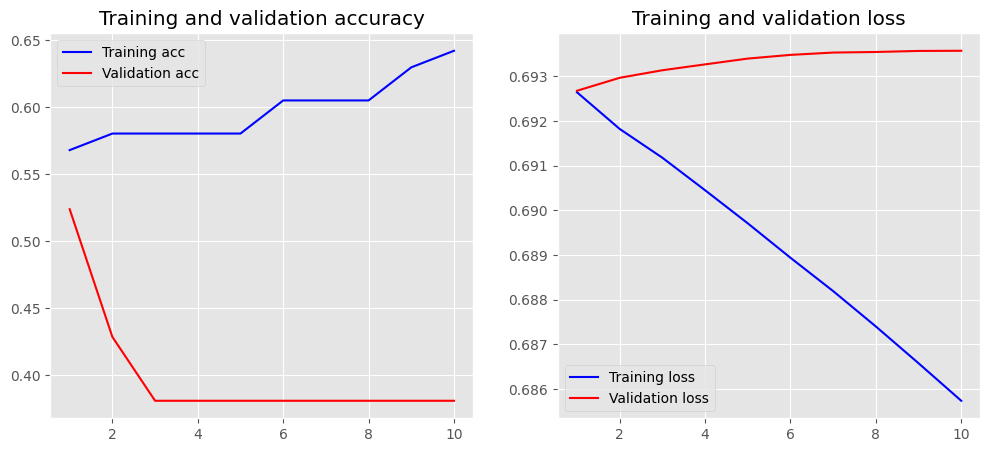

In [ ]:
plot_history(history)

#Word2Vec Example

##One hot encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
fruits = ['Apple', 'Pear', 'Grapes', 'Grapes', 'Banana']
encoder = LabelEncoder()
fruit_labels = encoder.fit_transform(fruits)
print(fruit_labels)

[0 3 2 2 1]


In [ ]:
#Transform to OneHotEncoder from Scikit-learn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
fruit_labels = fruit_labels.reshape((5, 1)) # change to a column vector from a row vector.
encoder.fit_transform(fruit_labels) #transform to a nxm matrix where n = number of datapoints and m is the number of labels.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

#Lets now embedd the words from corpus.

In [ ]:
from keras.preprocessing.text import Tokenizer
sentences_train, sentences_test, y_train, y_test = train_test_split(DocList,y, test_size=0.25, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

call 911 for the cliche police if you must , but the eyes are the window to the soul . 
the finest actors working in films are those who can command the screen with a gaze : paul newman , ralph fiennes , anthony hopkins , morgan freeman . 
you look at these men on screen and you can tell without them saying a word that there is something going on in their minds , that the characters they play are real human beings . 
we will never have a chance to discover if tupac shakur could have been a great actor , but he had that unique quality in his eyes . 
in gridlock'd , an oddly effective combination of gritty drama and social satire , shakur and his co-star tim roth take sketchy characters and make them exciting to watch through the pure energy of their talent and chemistry . 
shakur and roth play ezekiel " spoon " whitmore and alexander " stretch " rome , two detroit buddies who share a spoken word/jazz trio , an apartment and a drug addiction with cookie ( thandie newton ) . 
when a new y

#Lets inspect some token positions

In [ ]:
for word in ['spoon', 'stretch', 'fatuous', 'social']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

spoon: 407
stretch: 408
fatuous: 3809
social: 1355


#Padding
Since documents vary in length, we will have to pad them to make them all equal size.

In [ ]:
from keras.utils import pad_sequences
maxlen = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train)

[[1073   18  909 ...    0    0    0]
 [  38 3744 1334 ... 1731  197  917]
 [ 226   68 3825 ...  106  315  163]
 ...
 [   1  271    6 ...    1   90  482]
 [  16  143   15 ...  829   12  184]
 [  78 2192    3 ...    0    0    0]]


# Using Pretrained Word Embeddings
We just saw an example of jointly learning word embeddings incorporated into the larger model that we want to solve.

An alternative is to use a precomputed embedding space that utilizes a much larger corpus. It is possible to precompute word embeddings by simply training them on a large corpus of text. Among the most popular methods are Word2Vec developed by Google and GloVe (Global Vectors for Word Representation) developed by the Stanford NLP Group.

Note that those are different approaches with the same goal. Word2Vec achieves this by employing neural networks and GloVe achieves this with a co-occurrence matrix and by using matrix factorization. In both cases you are dealing with dimensionality reduction, but Word2Vec is more accurate and GloVe is faster to compute


Download the 6B (trained on 6 billion words) embedding from [here](https://nlp.stanford.edu/projects/glove/)

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Colab Notebooks/teaching/models/glove.6B/glove.6B.50d.txt',tokenizer.word_index, embedding_dim)

#Check the coverage

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

0.9495880978728637


#Create a NN with this embedding

In [ ]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix], #use a predetermined embedding matrix
                           input_length=maxlen,
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           406650    
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 407171 (1.55 MB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 406650 (1.55 MB)
_________________________________________________________________


#Fit the model

Training Accuracy: 0.3553
Testing Accuracy:  0.4231


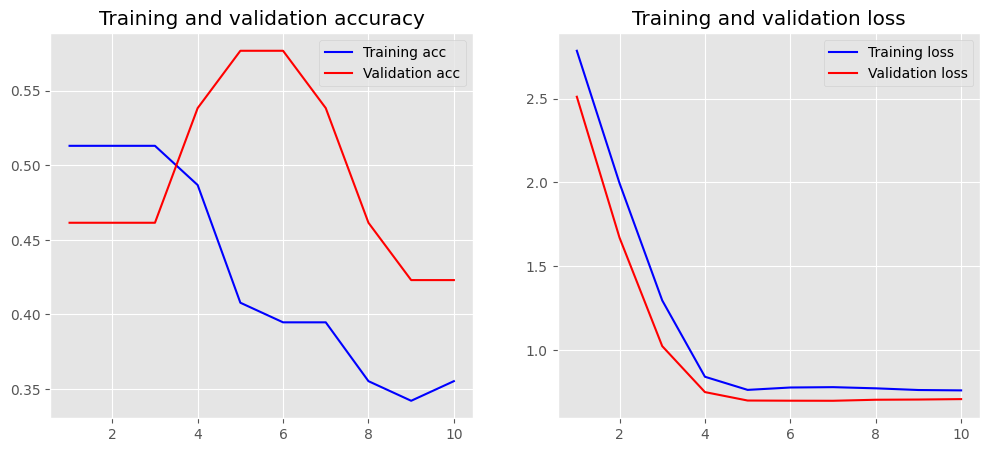

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Convolutional Neural Networks (CNN)
Yet another type of NN, Uses kernals to focus on parts of the data.
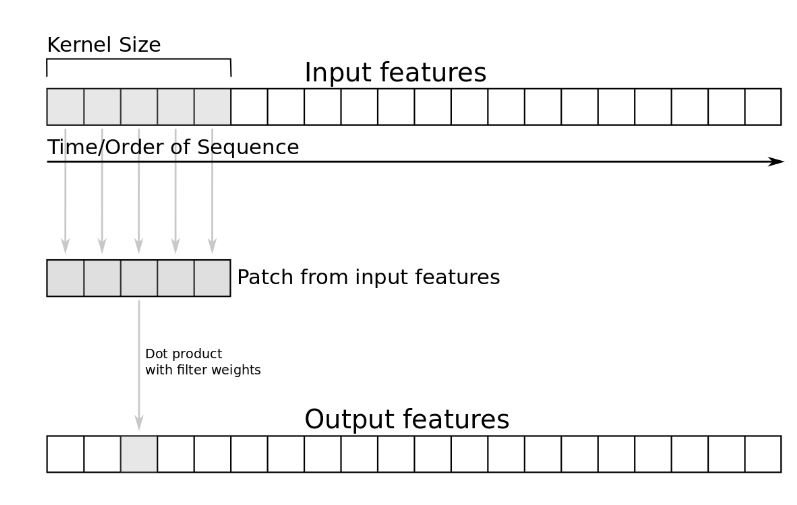

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          813300    
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 878729 (3.35 MB)
Trainable params: 878729 (3.35 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Training Accuracy: 1.0000
Testing Accuracy:  0.5385


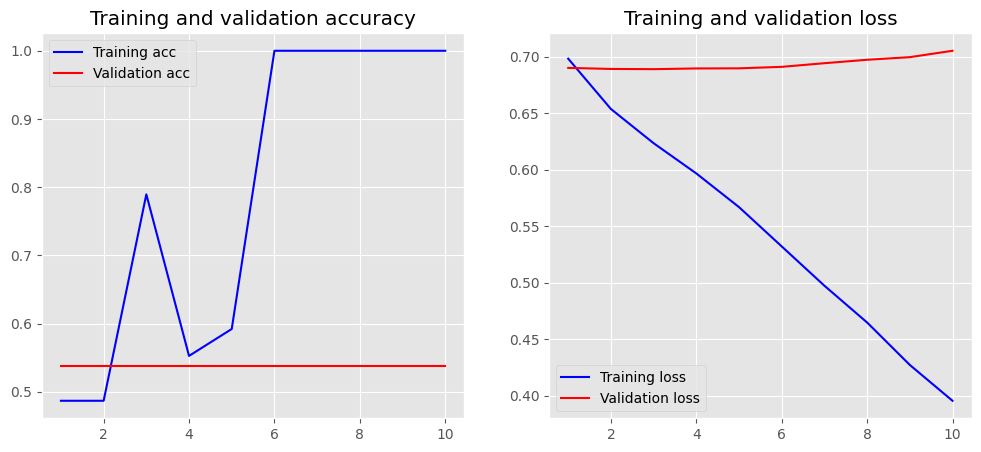

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)